<a href="https://colab.research.google.com/github/KauaHenSilva/python_style_transfer/blob/main/style_transfer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importes

In [27]:
import tensorflow as tf
import numpy as np

### Baixando network VGG19

In [28]:
network = tf.keras.applications.VGG19(include_top=False)

In [29]:
network.summary()

Model: "vgg19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)           │ (None, None, None, 3)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, None, None, 64)      │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, None, None, 64)      │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, None, None, 64)      │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, None, None, 128)     │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, None, None, 128)     │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, None, None, 128)     │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, None, None, 256)     │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, None, None, 256)     │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, None, None, 256)     │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv4 (Conv2D)                │ (None, None, None, 256)     │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, None, None, 256)     │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, None, None, 512)     │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv4 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, None, None, 512)     │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv4 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 20,024,384 (76.39 MB)

 Trainable params: 20,024,384 (76.39 MB)

 Non-trainable params: 0 (0.00 B)

In [30]:
len(network.layers)

22

## Carregamento e pré-processamento

In [31]:
from google.colab import drive
from google.colab.patches import cv2_imshow
import cv2

# Drive: https://drive.google.com/drive/folders/1EUdRpr5YXNgffO9qg4pY0243__Tz5PQC?usp=sharing
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### img conteudo

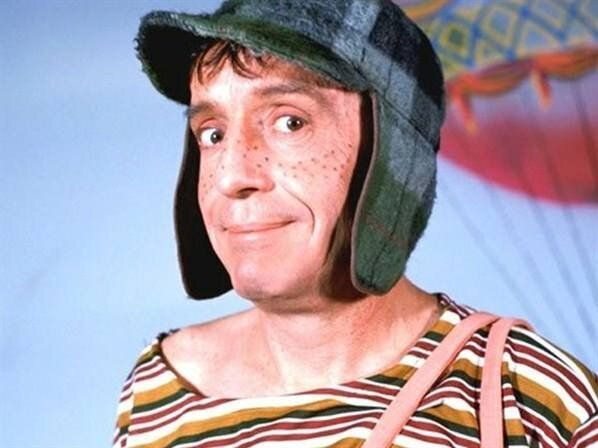

((1, 448, 598, 3), 1.0, 0.0)

In [32]:
img_conteudo = tf.keras.preprocessing.image.load_img('/content/drive/MyDrive/Visão Computacional Guia Completo/Images/chaves.jpeg')
img_conteudo = tf.keras.preprocessing.image.img_to_array(img_conteudo)
img_conteudo = cv2.cvtColor(img_conteudo, cv2.COLOR_BGR2RGB)
cv2_imshow(img_conteudo)
img_conteudo = img_conteudo / 255
img_conteudo = img_conteudo[tf.newaxis, :]
img_conteudo.shape, img_conteudo.max(), img_conteudo.min()

### Imagem estilo

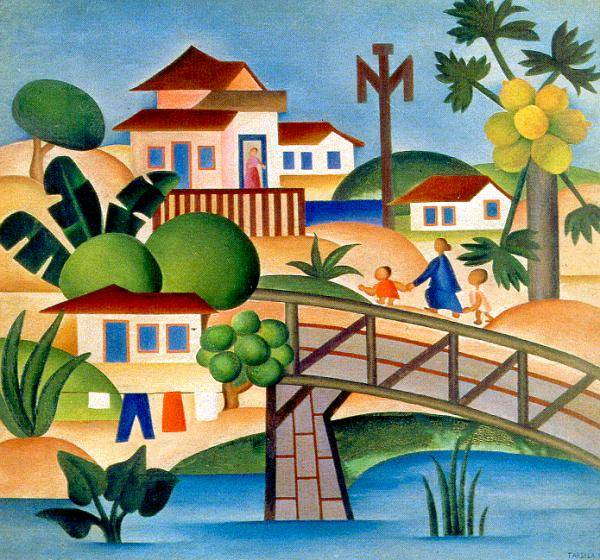

((1, 560, 600, 3), 1.0, 0.0)

In [33]:
img_estilo = tf.keras.preprocessing.image.load_img('/content/drive/MyDrive/Visão Computacional Guia Completo/Images/tarsila_amaral.jpg')
img_estilo = tf.keras.preprocessing.image.img_to_array(img_estilo)
img_estilo = cv2.cvtColor(img_estilo, cv2.COLOR_BGR2RGB)
cv2_imshow(img_estilo)
img_estilo = img_estilo / 255
img_estilo = img_estilo[tf.newaxis, :]
img_estilo.shape, img_estilo.max(), img_estilo.min()

## Construção da network

In [34]:
camadas_conteudo = ['block4_conv2']
camadas_estilo = ['block1_conv1', 'block2_conv1', 'block3_conv1', 'block4_conv1', 'block5_conv1']
numero_camadas_conteudo = len(camadas_conteudo)
numero_camadas_estilo = len(camadas_estilo)

In [35]:
def vgg_camadas(nome_camadas):
  vgg = tf.keras.applications.VGG19(include_top=False, weights='imagenet')
  vgg.trainable = False
  outputs = [vgg.get_layer(nome).output for nome in nome_camadas]
  network = tf.keras.Model(inputs = [vgg.input], outputs = outputs)
  return network

In [36]:
extrator_estilo = vgg_camadas(camadas_estilo)
extrator_estilo.summary()

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_7 (InputLayer)           │ (None, None, None, 3)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, None, None, 64)      │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, None, None, 64)      │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, None, None, 64)      │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, None, None, 128)     │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, None, None, 128)     │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, None, None, 128)     │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, None, None, 256)     │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, None, None, 256)     │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, None, None, 256)     │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv4 (Conv2D)                │ (None, None, None, 256)     │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, None, None, 256)     │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, None, None, 512)     │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv4 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, None, None, 512)     │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,944,960 (49.38 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 12,944,960 (49.38 MB)

In [37]:
saidas_estilo = extrator_estilo(img_estilo)

In [38]:
# https://www.tensorflow.org/api_docs/python/tf/einsum
def gram_matrix(ativacoes):
  resultado = tf.linalg.einsum('bijc,bijd->bcd', ativacoes, ativacoes)
  input_shape = tf.shape(ativacoes)
  num_locations = tf.cast(input_shape[1] * input_shape[2], tf.float32)
  return resultado / num_locations

In [39]:
class StyleContentModel(tf.keras.models.Model):
  def __init__(self, camadas_estilo, camadas_conteudo):
    super().__init__()
    self.vgg = vgg_camadas(camadas_estilo + camadas_conteudo)
    self.camadas_estilo = camadas_estilo
    self.camadas_conteudo = camadas_conteudo
    self.numero_camadas_estilo = len(camadas_estilo)
    self.vgg.trainable = False

  def call(self, imagem):
    imagem = imagem * 255.0
    imagem_preprocessada = tf.keras.applications.vgg19.preprocess_input(imagem)
    outputs = self.vgg(imagem_preprocessada)
    saidas_estilo = outputs[:self.numero_camadas_estilo] # 0-4
    saidas_conteudo = outputs[self.numero_camadas_estilo:] # 5:

    saidas_estilo = [gram_matrix(camada) for camada in saidas_estilo]

    conteudo_dict = {nome_conteudo: valor for nome_conteudo, valor in zip(self.camadas_conteudo, saidas_conteudo)}
    estilo_dict = {nome_estilo: valor for nome_estilo, valor in zip(self.camadas_estilo, saidas_estilo)}

    return {'conteudo': conteudo_dict, 'estilo': estilo_dict}

In [40]:
extrator = StyleContentModel(camadas_estilo, camadas_conteudo)

In [41]:
resultados = extrator(img_conteudo)

In [42]:
estilo_objetivo = extrator(img_estilo)['estilo']
conteudo_objetivo = extrator(img_conteudo)['conteudo']

In [43]:
len(estilo_objetivo), len(conteudo_objetivo)

(5, 1)

In [45]:
nova_imagem = tf.Variable(img_conteudo)

In [46]:
peso_conteudo = 1
peso_estilo = 1000

In [47]:
optimizer = tf.optimizers.Adam(learning_rate=0.02)